In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [4]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/11/2021', end='1/28/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [5]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [10]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 50)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 900 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[381055.1779837059, 382868.6167675855, 384624.3260742873, 386325.02612076094, 387973.21558427915, 389571.1962509129, 391121.0942528703, 392624.8784525218, 394084.3764266035, 395501.28842157614, 396877.19958540413, 398213.5907283472, 399511.8478228629, 400773.2704182546, 401999.0791175689, 403190.42224118684, 404348.3817825391, 405473.97874563077, 406568.17794096365, 407631.8923054968, 408665.9868031052, 409671.2819542622, 410648.5570371286, 411598.5529966863, 412521.9750938249, 413419.495322257, 414291.7546176738, 415139.3648805831, 415962.91083170165, 416762.9517165629, 417540.02287407167, 418294.6371820721, 419027.2863915348, 419738.44235969766, 420428.55819138105, 421098.0692967188, 421747.3943726877, 422376.93631505675, 422987.0830667118, 423578.2084077132, 424150.6726919234, 424704.82353456697, 425240.99645467976, 425759.5154760217, 426260.69368970534, 426744.8337814907, 427212.2285264337, 427663.16125333577, 428097.9062812285, 428516.72932993446]


In [11]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [12]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-01-29  381055.177984  6.854807e+06
2021-01-30  382868.616768  7.237676e+06
2021-01-31  384624.326074  7.622300e+06
2021-02-01  386325.026121  8.008625e+06
2021-02-02  387973.215584  8.396598e+06
2021-02-03  389571.196251  8.786170e+06
2021-02-04  391121.094253  9.177291e+06
2021-02-05  392624.878453  9.569916e+06
2021-02-06  394084.376427  9.964000e+06
2021-02-07  395501.288422  1.035950e+07
2021-02-08  396877.199585  1.075638e+07
2021-02-09  398213.590728  1.115459e+07
2021-02-10  399511.847823  1.155410e+07
2021-02-11  400773.270418  1.195488e+07
2021-02-12  401999.079118  1.235688e+07
2021-02-13  403190.422241  1.276007e+07
2021-02-14  404348.381783  1.316441e+07
2021-02-15  405473.978746  1.356989e+07
2021-02-16  406568.177941  1.397646e+07
2021-02-17  407631.892305  1.438409e+07
2021-02-18  408665.986803  1.479276e+07
2021-02-19  409671.281954  1.520243e+07
2021-02-20  410648.557037  1.561307e+07


In [13]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-11  100000.000000  1.959151e+06
2021-01-12  121129.000000  2.080280e+06
2021-01-13  174276.000000  2.254556e+06
2021-01-14  239815.000000  2.494371e+06
2021-01-15  274793.000000  2.769164e+06
...                   ...           ...
2021-03-15  426744.833781  2.527245e+07
2021-03-16  427212.228526  2.569966e+07
2021-03-17  427663.161253  2.612733e+07
2021-03-18  428097.906281  2.655542e+07
2021-03-19  428516.729330  2.698394e+07

[67 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

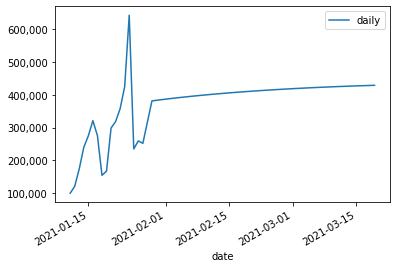

<Figure size 432x288 with 0 Axes>

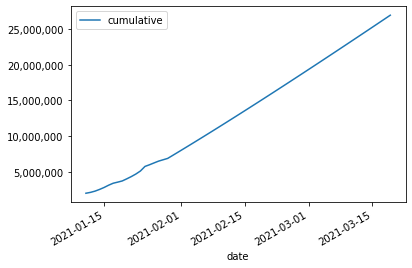

In [14]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

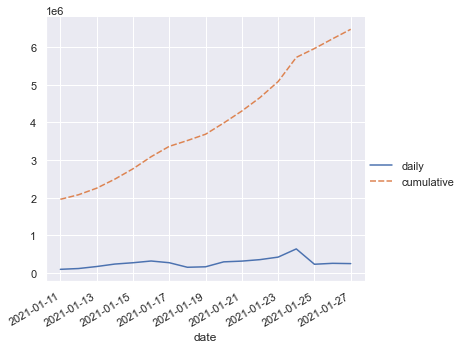

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
